## 0. Tips data EDA 

In the whole exercise, we will work with the "tips" dataset from seaborn dataset. Start by loading dataset "tips" from the ```load_dataset``` method in seaborn module. The goal will be to use polynomial linear regression to predict tips. 



In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# Load the "mpg" dataset
df = sns.load_dataset("tips")

# Print the first few rows of the dataset
df.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


&nbsp; a) Start by doing some initial EDA such as info(), describe().


In [2]:
# a) Initial EDA
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [3]:
df.isnull().sum() # no missing values in df

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

&nbsp; b) Use describe only on those columns that are relevant to get statistical information from. Plot the descriptive statistics for each numerical column, with a adequate plot type (e.g. barplot).

In [4]:
descriptive=df.describe()
descriptive

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [5]:

# remove the 'count' row
descriptive_stats = descriptive.drop('count')
descriptive_stats



,total_bill,tip,size
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


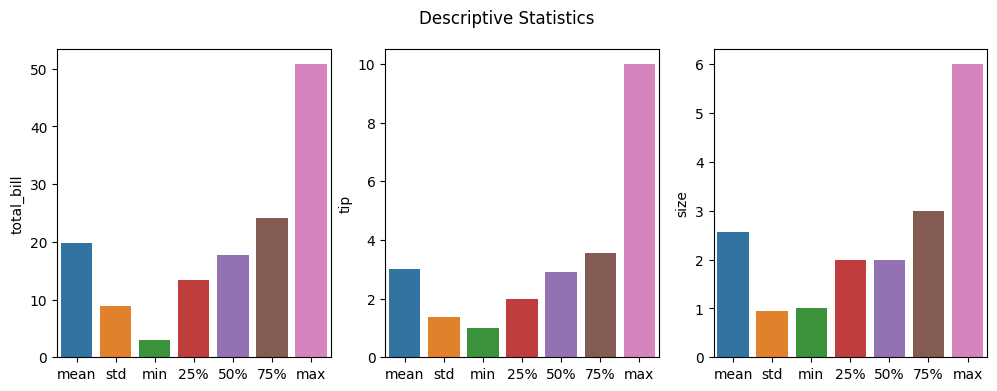

In [6]:
# for sub plots
fig, ax = plt.subplots(1,3, figsize=(12, 4))


# set the title of the figure
fig.suptitle('Descriptive Statistics')

# plot each column on a separate subplot
sns.barplot(data=descriptive_stats, x=descriptive_stats.index, y='total_bill',ax=ax[0])
sns.barplot(data=descriptive_stats, x=descriptive_stats.index, y='tip', ax=ax[1])
sns.barplot(data=descriptive_stats, x=descriptive_stats.index, y='size', ax=ax[2])

# display the plot
plt.show()

Text(0, 0.5, 'Value')

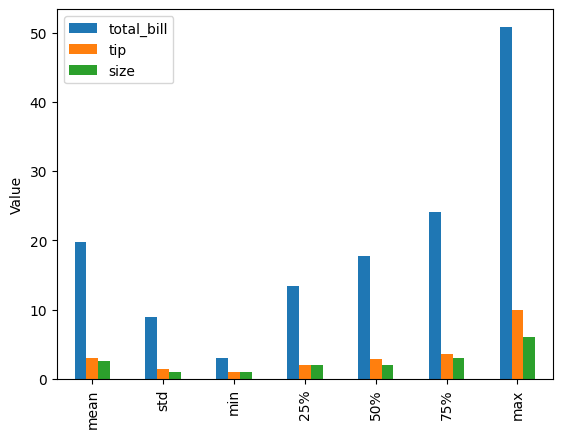

In [7]:

# Create a barplot of the statistics using the plot() method
ax = descriptive_stats.plot(kind='bar')
ax.set_ylabel('Value')


&nbsp; c) Based on the initial EDA, make some more plots on things you think could be worthwhile to investigate. 


In [8]:
# Total number of males and females present in data set 

total_count = df['sex'].value_counts()
total_count



Male      157
Female     87
Name: sex, dtype: int64

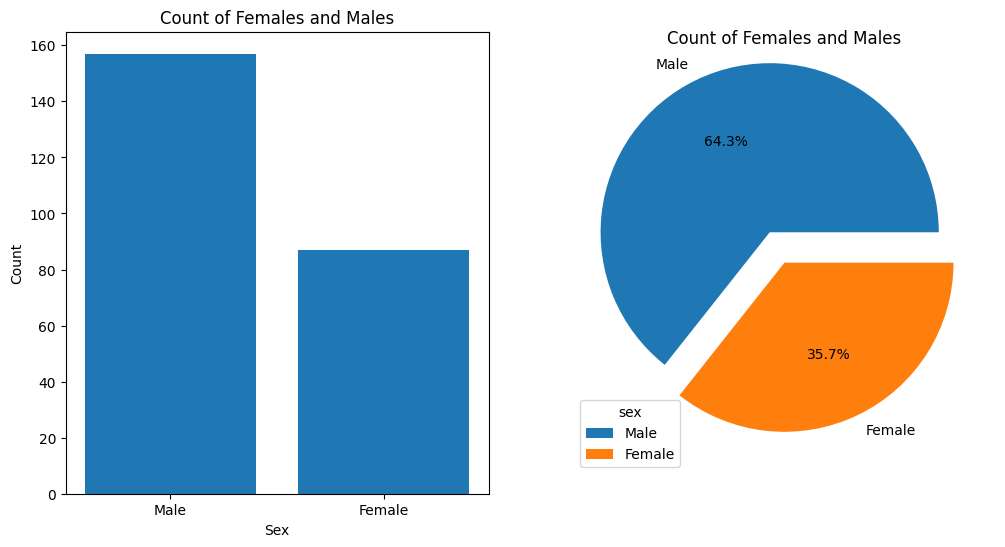

In [9]:
#subplots
fig, ax = plt.subplots(1,2,figsize=(12, 6))

# create a bar plot of the counts
ax[0].bar(total_count.index,total_count.values)

# set the axis labels and title
ax[0].set_xlabel('Sex')
ax[0].set_ylabel('Count')
ax[0].set_title('Count of Females and Males')

# create a pie chart of the counts
ax[1].pie(total_count.values, labels=total_count.index, autopct='%1.1f%%',explode= (0.2,0))

# set the title
ax[1].set_title('Count of Females and Males')
ax[1].legend(title = "sex")
# display the plot
plt.show()


In [10]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<Axes: xlabel='total_bill', ylabel='tip'>

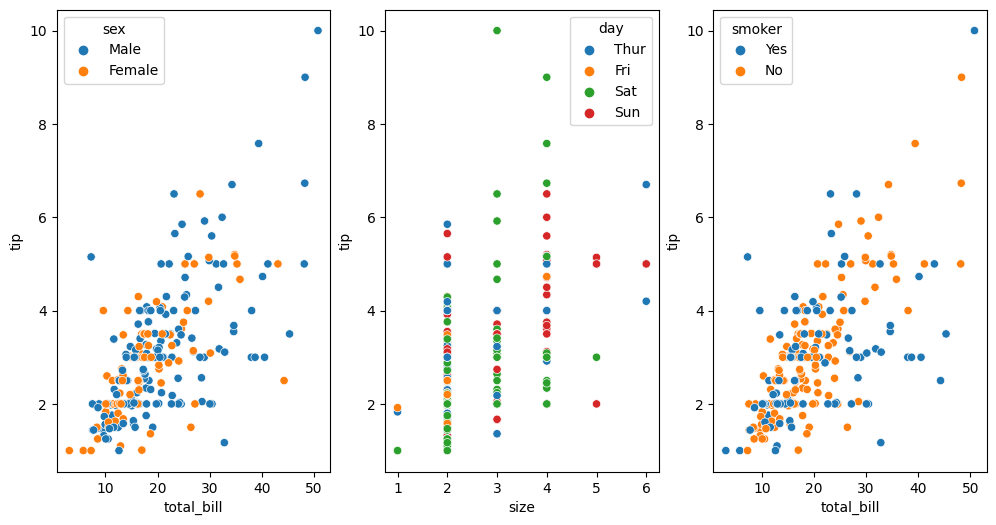

In [23]:
# total tips given by males and females
fig, ax = plt.subplots(1,3,figsize=(12, 6))
sns.scatterplot(data=df, x='total_bill', y= 'tip', hue='sex',ax =ax[0])
sns.scatterplot(data=df, x='size', y= 'tip', hue='day',ax=ax[1])
sns.scatterplot(data=df, x='total_bill', y= 'tip', hue='smoker',ax=ax[2])


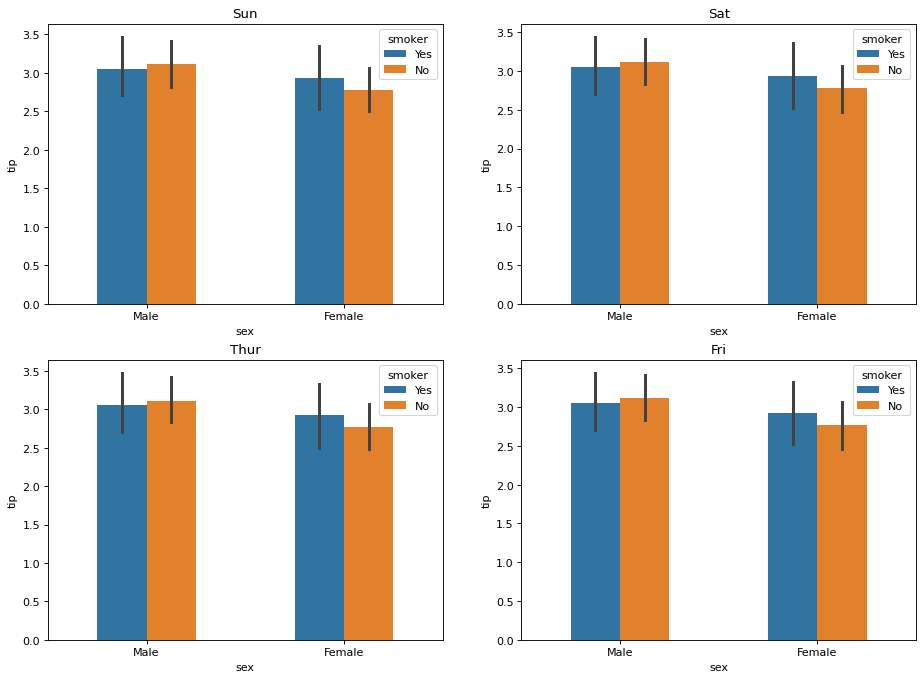

In [88]:
fig= plt.figure(dpi=80,figsize=(14, 10))
for i, day in enumerate(df['day'].unique()):
    ax=plt.subplot(2,2,i+1)
    sns.barplot(data =df, x='sex', y='tip', hue='smoker',width= .5)
    ax.set_title(day)





&nbsp; d) Try discuss your findings with yourself/colleague and draw some conclusions if possible. Note that in reality, it is important to be able to communicate your findings so that other people in your team/customers/stakeholders etc. get an understanding of the data and realizes the importance of your role as a data scientist/analyst.


### Total number of tips given by males and females during lunch and dinner time

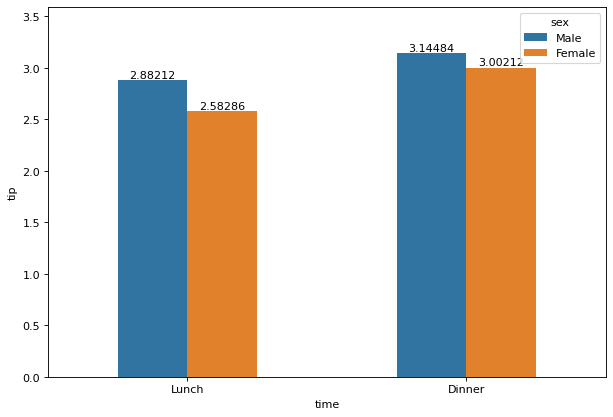

In [117]:
fig= plt.figure(dpi=80,figsize=(9, 6))
ax= sns.barplot(data =df, x='time', y='tip',hue='sex',errwidth=0,width=.5)

for container in ax.containers:
    ax.bar_label(container)

### Tips on lunch and dinner time of each day 

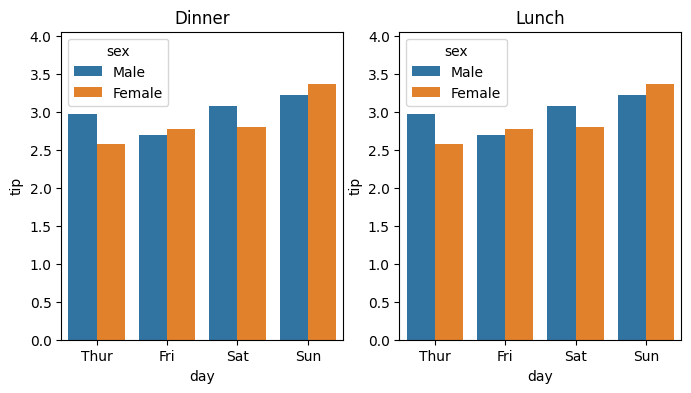

In [130]:
fig= plt.figure(dpi=100,figsize=(8, 4))
for i, time in enumerate(df['time'].unique()):
    ax=plt.subplot(1,2,i+1)
    sns.barplot(data =df, x='day', y='tip',hue='sex',errwidth=0)
    ax.set_title(time)
    

## 1. Train|test split 

Split the data into training part and testing part, using sklearn's train_test_split with test size of 0.3 and random_state 42.

In [132]:
X,y= df[['total_bill','size']],df['tip']
X.head()

,total_bill,size
0,16.99,2
1,10.34,3
2,21.01,3
3,23.68,2
4,24.59,4


In [133]:
# train|test split using scikit-learn
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape,y_train.shape, X_test.shape,y_test.shape

((195, 2), (195,), (49, 2), (49,))

## 2. Feature standardization 

We need to normalize the data and in this case will be using feature standardization. Implement this yourself following this formula:

$$X_{train}' = \frac{X_{train}-\mu_{train}}{\sigma_{train}}$$

$$X_{test}' = \frac{X_{test}-\mu_{train}}{\sigma_{train}}$$

, where $'$ denotes scaled, $\mu_{train}$ is the mean of the training data, $\sigma_{train}$ is the standard deviation of the training data. Note that it is very important that the mean and standard deviation is computed from the training data and not from testing data to avoid data leakage. Control the standard deviation and mean of $X_{train}'$ and $X_{test}'$. Is the results as you expect, why, why not?


In [141]:
mu_train = X_train.mean()
sigma_train= X_train.std()

In [145]:
scaled_X_train = (X_train-mu_train)/sigma_train
scaled_X_test = (X_test-mu_train)/sigma_train

print(scaled_X_train.mean())
scaled_X_test.mean(),scaled_X_train.std(),scaled_X_test.std()

total_bill    9.337260e-17
size         -1.685262e-16
dtype: float64


(total_bill   -0.245133
 size         -0.024810
 dtype: float64,
 total_bill    1.0
 size          1.0
 dtype: float64,
 total_bill    1.060770
 size          1.064399
 dtype: float64)

# 3. Polynomial features

We want to investigate ```Polynomialfeatures``` from scikit-klearn in this task. Start by instantiating an object of type ```PolynomialFeatures``` with degree 2. Now do the following: 

- use the method fit on $X_{train}'$
- transform $X_{train}'$
- transform $X_{test}'$

Compare this transformed $X_{test}'$ with $X_{test}''$ where $X_{test}''$ comes from fitting the polynomial features to $X_{test}'$ and transforming $X_{test}'$. You can check directly by using ```==``` and then sum it up. If the value is same as the length, then you know that they are the same, as a boolean True evaluates to 1. 
